#### Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

#### Normal Distribution via Box Muler method:

In [2]:
def box_muller(n):
    u1 = np.random.uniform(size=n)
    u2 = np.random.uniform(size=n)
    z1 = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)
    return z1

#### Cholesky decomposition:

In [3]:
def cholesky_decomposition(sigma):
    n, m = sigma.shape
    if n != m:
        raise ValueError("Input matrix must be square")
    if not np.allclose(sigma, sigma.T):
        raise ValueError("Input matrix must be symmetric")
    L = np.zeros_like(sigma)
    for i in range(n):
        for j in range(i+1):
            s = 0
            for k in range(j):
                s += L[i,k] * L[j,k]
            if i == j:
                L[i,j] = np.sqrt(sigma[i,j] - s)
            else:
                L[i,j] = (sigma[i,j] - s) / L[j,j]
    return L

#### Random vectors generator:

In [4]:
def random_vectors_generator(dimensions):
  mean=np.zeros(max(dimensions))
  cov=np.eye(max(dimensions))
  smpl=[]
  for d in dimensions:
    z=box_muller(d)
    chol_cov=cholesky_decomposition(cov[:d,:d])
    x=np.dot(chol_cov,z)
    x=x+mean[:d]
    print(f"Random vector of dimension {d}:")
    print(x)
    smpl.append(x)
  return smpl

In [5]:
random_vectors_generator([2,5,10])

Random vector of dimension 2:
[0.5928638 0.4012576]
Random vector of dimension 5:
[ 0.85789911  0.30861848 -0.82649835  0.60836025  0.65534836]
Random vector of dimension 10:
[-0.98679418 -1.07391538 -0.52712994 -1.04976733 -0.19144316 -0.15702946
 -0.78847641 -0.30454854 -1.21593903  0.36210588]


[array([0.5928638, 0.4012576]),
 array([ 0.85789911,  0.30861848, -0.82649835,  0.60836025,  0.65534836]),
 array([-0.98679418, -1.07391538, -0.52712994, -1.04976733, -0.19144316,
        -0.15702946, -0.78847641, -0.30454854, -1.21593903,  0.36210588])]

#### Sampling from random vectors:

In [6]:
def random_vectors_generator1(nsamples,dimensions):
  mean=np.zeros(max(dimensions))
  cov=np.eye(max(dimensions))
  smpl=[]
  for d in dimensions:
    z = np.zeros((d, nsamples))
    for i in range(nsamples):
        z[:, i] = box_muller(d)
    chol_cov = cholesky_decomposition(cov[:d, :d])
    x = np.dot(chol_cov, z)
    x = x + mean[:d, None]
    smpl.append(x)
  return smpl

In [7]:
dims = [2,5]
mu = np.zeros(max(dims))
sigma = np.eye(max(dims))
n_samples = 10000

In [8]:
rndm_samples=random_vectors_generator1(n_samples,dims)
rndm_samples[1].T

array([[-0.82245712, -0.53804988, -0.47671217, -1.76070911, -1.7048853 ],
       [ 0.14895708,  1.10540449,  0.73014528,  0.7205169 , -0.46600984],
       [-0.68096704, -0.29771372, -0.37335203,  0.62491156, -0.76326754],
       ...,
       [ 0.17326276,  0.89036333,  0.51000494,  0.64389861, -0.8390834 ],
       [-1.11919461,  0.95239098,  0.95889274, -0.94593082, -1.02625644],
       [ 0.76710755,  0.74375736, -0.73290938,  1.59746375,  0.59470443]])

#### Estimate parameters of underlying normal distribution:

In [9]:
for i, x in enumerate(rndm_samples):
    d = dims[i]
    sample_mean = np.mean(x, axis=1)
    sample_cov = np.cov(x)
    print(f"Sample mean of dimension {d}:")
    print(sample_mean)
    print(f"Sample covariance matrix of dimension {d}:")
    print(sample_cov)

Sample mean of dimension 2:
[-0.02196847 -0.00707715]
Sample covariance matrix of dimension 2:
[[ 1.00828345 -0.00516986]
 [-0.00516986  0.98441776]]
Sample mean of dimension 5:
[-0.0106024  -0.01107795  0.00121655 -0.01546305  0.00112254]
Sample covariance matrix of dimension 5:
[[ 1.01311393e+00 -1.68888191e-02 -7.23187563e-03 -5.15980688e-03
   2.02558719e-03]
 [-1.68888191e-02  9.77156697e-01  4.16276543e-03  4.34730062e-03
  -5.48831224e-03]
 [-7.23187563e-03  4.16276543e-03  9.97776382e-01 -1.58110510e-03
   3.13601492e-05]
 [-5.15980688e-03  4.34730062e-03 -1.58110510e-03  1.00330144e+00
   2.06495551e-03]
 [ 2.02558719e-03 -5.48831224e-03  3.13601492e-05  2.06495551e-03
   9.91952660e-01]]


#### I observe that the sample mean and sample covariance matrix are both close to the true mean vector and identity matrix, respectively. The accuracy of the parameter estimates increases as the size of the sample set increases. 

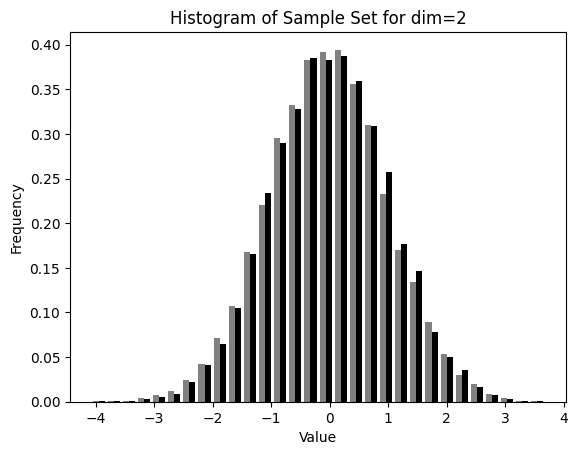

In [10]:
plt.hist(rndm_samples[0].T, bins=30, density=True,color={'gray','black'})
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Set for dim=2')
plt.show()

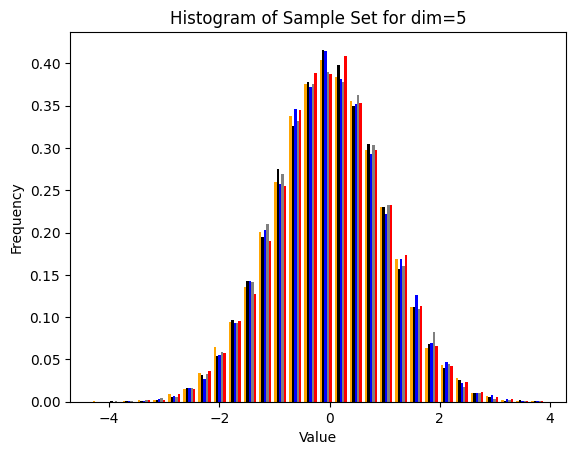

In [11]:
plt.hist(rndm_samples[1].T, bins=30, density=True,color={'gray','black','red','blue','orange'})
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Set for dim=5')
plt.show()

#### Random vector generator for d-dimensions, mu!=0 and Sigma !=I

In [12]:
def random_vectors_generator_nonzero(mean,cov,dimensions,size):
  mean = np.asarray(mean)
  cov = np.asarray(cov)
  assert mean.ndim == 1
  assert cov.ndim == 2
  assert mean.shape[0] == cov.shape[0] == cov.shape[1]
  smpl=[]
  for d in dimensions:
    z = np.zeros((d, size))
    for i in range(size):
        z[:, i] = box_muller(d)
    chol_cov = cholesky_decomposition(cov[:d, :d])
    x = np.dot(chol_cov, z)
    x = x + mean[:d, None]
    smpl.append(x)
  return smpl

#### Sample set of random vector:

In [13]:
mu = np.array([1, 2, 3])
sigma = np.array([[2, 0.5, 0.5],
                  [0.5, 3, 0],
                  [0.5, 0, 1]])
size=100000
samples = random_vectors_generator_nonzero(mu, sigma,[3], size)

In [14]:
samples[0].T

array([[-1.40711095,  1.50090409,  2.69511277],
       [ 3.29869239,  0.06032117,  2.74245519],
       [ 0.07723496,  5.13489946,  2.56665558],
       ...,
       [ 1.58112189,  1.68036003,  1.78797621],
       [ 2.56442889,  0.94131131,  2.98711269],
       [ 0.28676003,  2.33596291,  4.12679278]])

In [15]:
mu1 = np.array([-1, 0, 1,2])
sigma1 = np.array([[2,   0.5, 0.5,  0.4],
                  [0.5, 3,   0.2,  0],
                  [0.5, 0.2, 1,    0.4],
                  [0.4, 0,   0.4,  3]])
samples1 = random_vectors_generator_nonzero(mu1, sigma1,[4], size)

In [16]:
samples1[0].T

array([[ 0.00690153,  0.12034756,  0.87390026,  2.34072309],
       [-0.64775104, -0.96947771,  0.390862  ,  1.43012895],
       [-1.79556114, -0.12623437,  0.24079025, -0.00582479],
       ...,
       [ 1.69206197,  3.31879088,  3.16687296,  0.82961555],
       [ 0.03183034,  2.88266423, -0.45072025, -2.1677754 ],
       [-2.05643189, -1.29604008,  1.39371746, -1.58248403]])

#### Parameters estimation:

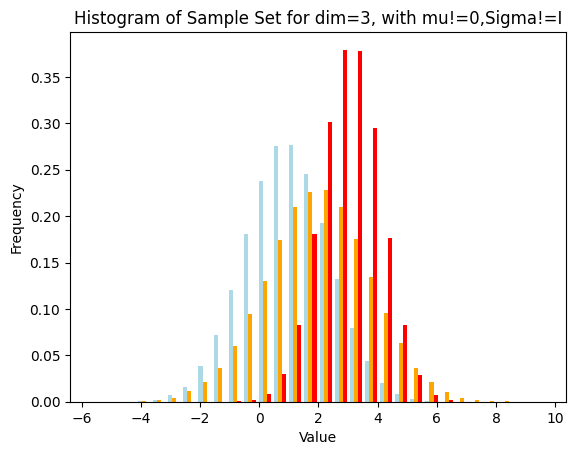

In [17]:
plt.hist(samples[0].T, bins=30, density=True,color={'lightblue','red','orange'})
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Set for dim=3, with mu!=0,Sigma!=I')
plt.show()

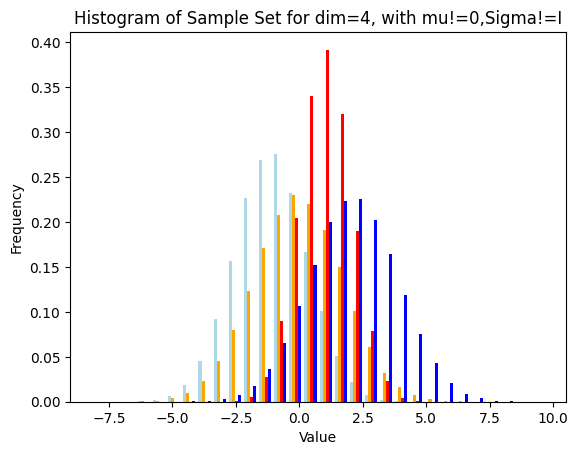

In [18]:
plt.hist(samples1[0].T, bins=30, density=True,color={'lightblue','red','orange','blue'})
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Set for dim=4, with mu!=0,Sigma!=I')
plt.show()

In [19]:
N = 10000
x = np.random.normal(0.0, 1.0, size=N)
thetas = np.linspace(-3, 3, 101)
probs = []
for theta in thetas:
    count = np.sum(x < theta)
    prob = count / N
    probs.append(prob)

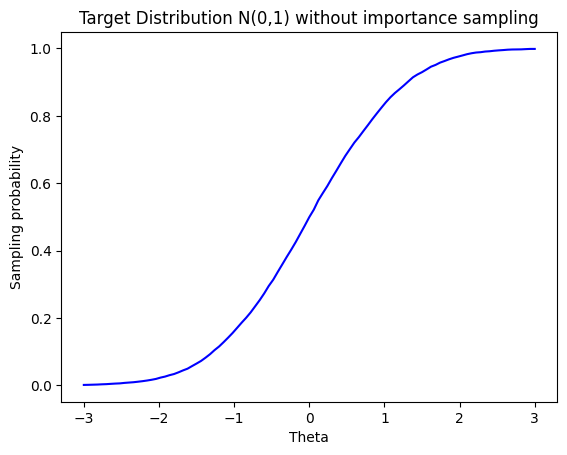

In [20]:
plt.plot(thetas, probs,color='blue')
plt.xlabel('Theta')
plt.ylabel('Sampling probability')
plt.title("Target Distribution N(0,1) without importance sampling")
plt.show()

In [21]:
# Target distribution p(x) for N(0,1)
def p(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
#Proposal distribution q(x) for N(0.0, 1.0)
def q(x):
    return np.exp(-0.5 * x**2 / 1.0) / np.sqrt(2 * np.pi)

N = 10000
x = np.random.normal(0.0, 1.0, size=N)
weights = p(x) / q(x)
thetas = np.linspace(-3, 3, 101)
probs2 = []
for theta in thetas:
    Pxi = (x < theta).astype(int)
    prob = np.sum(weights * Pxi) / np.sum(weights)
    probs2.append(prob)

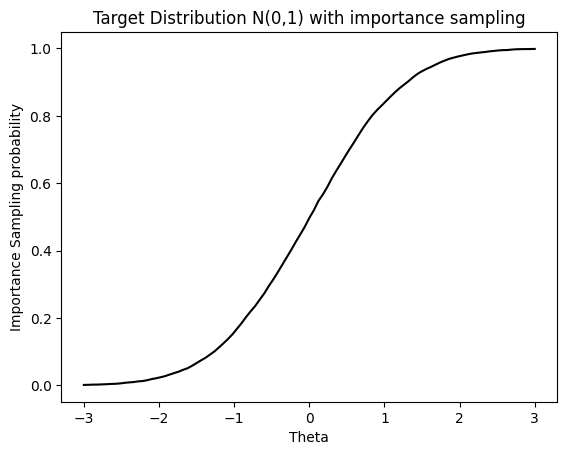

In [22]:
plt.plot(thetas, probs2,color='black')
plt.xlabel('Theta')
plt.ylabel('Importance Sampling probability')
plt.title("Target Distribution N(0,1) with importance sampling")
plt.show()

#### Plot the estimation result using the two techniques (with and without Importance Sampling) as a function of the parameter θ in a meaningful way.


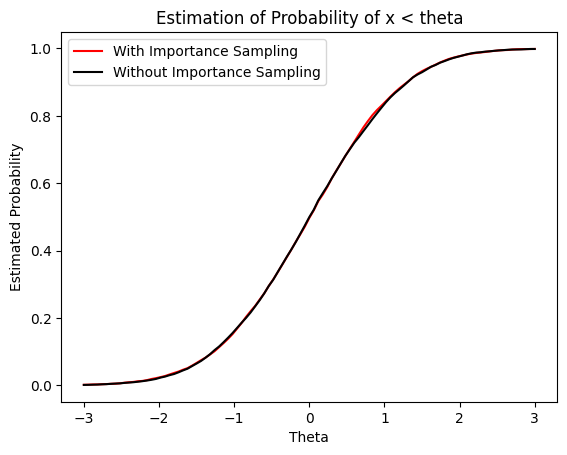

In [23]:
plt.plot(thetas, probs2, label='With Importance Sampling',color='red')
plt.plot(thetas, probs, label='Without Importance Sampling',color='black')
plt.xlabel('Theta')
plt.ylabel('Estimated Probability')
plt.title('Estimation of Probability of x < theta')
plt.legend()
plt.show()

In [24]:
def generate_uniform_samples(n,r1):
    return np.random.uniform(low=-0.5, high=r1, size=(n, 2))

def generate_importance_samples(n,r2):
    r_samples = np.random.uniform(low=0.0, high=r2, size=n) ** 2
    theta_samples = np.random.uniform(low=0.0, high=2*np.pi, size=n)
    x_samples = np.sqrt(r_samples) * np.cos(theta_samples)
    y_samples = np.sqrt(r_samples) * np.sin(theta_samples)
    return np.stack((x_samples, y_samples), axis=1)

def estimate_circle_area_uniform(n,r1):
    x = generate_uniform_samples(n,r1)
    d = np.linalg.norm(x, axis=1)
    return np.count_nonzero(d < r1) / n * 4 * 0.25

def estimate_circle_area_importance(n,r2):
    x = generate_importance_samples(n,r2)
    d = np.linalg.norm(x, axis=1)
    p = np.pi * d ** 2 / (r2 ** 2)
    return np.sum(p) / n * 4 * 0.25

def circle_estimation(r1,r2,N):
  xUR= generate_uniform_samples(N,r1)
  xIS= generate_importance_samples(N,r2)
  area_UR=estimate_circle_area_uniform(N,r1)
  area_IS=estimate_circle_area_importance(N,r2)
  return area_IS,area_UR

def plot_circleArea_Estimation(r1,r2,n_samples):
  plt.figure(figsize=(4,4))
  plt.scatter(generate_uniform_samples(n_samples,r1)[:,0], generate_uniform_samples(n_samples,r1)[:,1], s=1, alpha=0.5)
  circle = plt.Circle((0,0), r1, color='red', fill=False)
  plt.gca().add_artist(circle)
  plt.xlim(-0.5, 0.5)
  plt.ylim(-0.5, 0.5)
  plt.title(f'URS inside Circle of Radius {r1}')
  plt.show()

  plt.figure(figsize=(4,4))
  plt.scatter(generate_importance_samples(n_samples,r2)[:,0], generate_importance_samples(n_samples,r2)[:,1], s=1, alpha=0.5)
  circle = plt.Circle((0,0), r2, color='green', fill=False)
  plt.gca().add_artist(circle)
  plt.xlim(-0.5, 0.5)
  plt.ylim(-0.5, 0.5)
  plt.title(f'IRS inside Circle of Radius {r2}')
  plt.show()

In [25]:
r1,r2=0.5,0.2
N=100
au,ai=circle_estimation(r1,r2,N)

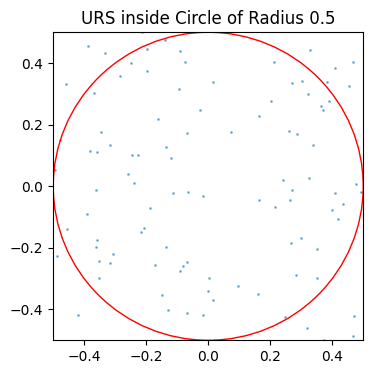

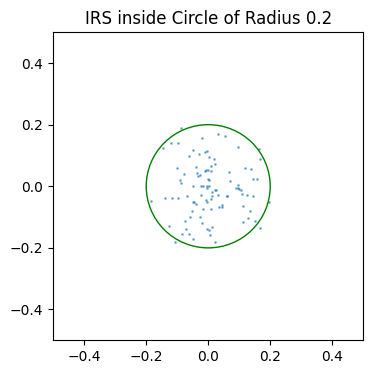

In [26]:
plot_circleArea_Estimation(r1,r2,100)

In [33]:
r = 0.5
N = 1000
count = 0
for i in range(N):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    distance = math.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    if distance <= r:
        count += 1
percentage_inside_circle = (count / N) * 100
estimated_area = percentage_inside_circle * (1**2)
exact_area = math.pi * r**2
relative_error = abs(estimated_area - exact_area) / exact_area * 100

print("Estimated area covered by the circle: {:.4f}".format(estimated_area))
print("Exact area of the circle: {:.4f}".format(exact_area))
print("Relative error: {:.2f}%".format(relative_error))

Estimated area covered by the circle: 12.0000
Exact area of the circle: 0.1257
Relative error: 9449.30%


#### When r gets very small, the estimated area using the method described above becomes increasingly inaccurate. This is because the area of the circle becomes much smaller than the area of the square, and so the proportion of random samples that fall within the circle becomes very small. This can lead to a large relative error in the estimated area, and the estimate may not be very useful.

In [34]:
r = 1e-10
N = 1000
def proposal1():
    theta = random.uniform(0, 2*math.pi)
    radius = r * math.sqrt(random.uniform(0, 1))
    x = radius * math.cos(theta)
    y = radius * math.sin(theta)
    return x, y
def proposal2():
    x = random.gauss(0, r/3)
    y = random.gauss(0, r/3)
    return x, y
count = 0
for i in range(N):
    x, y = proposal1()
    if x**2 + y**2 <= r**2:
        weight = 1 / (math.pi * r**2)
        count += weight
estimated_area1 = count / N * math.pi * r**2
count = 0
for i in range(N):
    x, y = proposal2()
    if x**2 + y**2 <= r**2:
        # Calculate the weight of the sample using the ratio of the proposal distribution to the target distribution
        weight = 1 / (2 * math.pi * r**2 / (3 * math.sqrt(2*math.pi) * r))
        count += weight

# Calculate the estimated area covered by the circle using proposal distribution 2
estimated_area2 = count / N * math.pi * r**2
exact_area = math.pi * r**2
relative_error1 = abs(estimated_area1 - exact_area) / exact_area * 100
relative_error2 = abs(estimated_area2 - exact_area) / exact_area * 100
print("Estimated area covered by the circle using proposal distribution 1: ", estimated_area1)
print("Estimated area covered by the circle using proposal distribution 2: ", estimated_area2)
print("Relative Error 1: ", relative_error1)
print("Relative Error 2: ", relative_error2)

Estimated area covered by the circle using proposal distribution 1:  1.0000000000000067
Estimated area covered by the circle using proposal distribution 2:  3.692263448531461e-10
Relative Error 1:  3.1830988618379276e+21
Relative Error 2:  1175283957962.6199


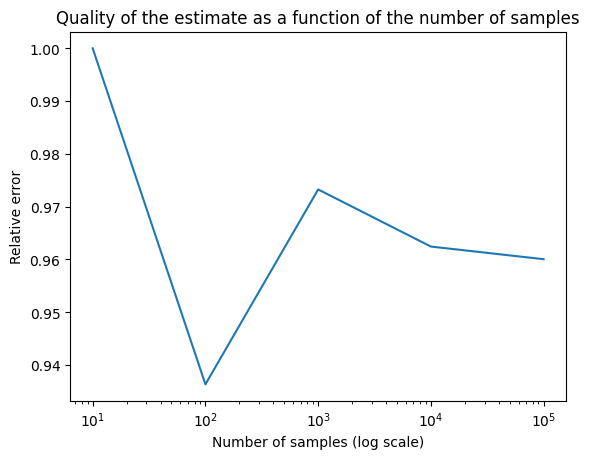

In [35]:
r = 0.1
N_list = [10**i for i in range(1, 6)]
def proposal():
    x = random.uniform(-0.5, 0.5)
    y = random.uniform(-0.5, 0.5)
    return x, y
relative_errors = []
for N in N_list:
    count = 0
    for i in range(N):
        x, y = proposal()
        if x**2 + y**2 <= r**2:
            count += 1
    estimated_area = count / N * 4 * r**2
    exact_area = math.pi * r**2
    relative_error = abs(estimated_area - exact_area) / exact_area
    relative_errors.append(relative_error)

plt.plot(N_list, relative_errors)
plt.xscale("log")
plt.xlabel("Number of samples (log scale)")
plt.ylabel("Relative error")
plt.title("Quality of the estimate as a function of the number of samples")
plt.show()

#### The number of samples required for a stable estimate of the area depends on several factors such as the radius of the circle, the dimensions of the enclosing square, the chosen proposal distribution, and the desired level of accuracy.